## COG403: Problem 1 of Problem Set 1: Neural Nets and Back Propagation

### All 3 problems for Problem Set 1 Due 4 October 2018

Consider the neural network in the figure below


![Alt text](https://notebooks.azure.com/juliawatson/libraries/q1-neural-net-back-propagation/raw/neural_network.png)

### (a)
Assume a logistic activation function for each unit,
$$x_{i+1} = \frac{1}{1 +e ^ {-w_ix_i}} \quad\quad (1)$$
where $w_ix_i$ is the input to unit $i + 1$. Assume connection weights of $w_1 = 5$ and $w_2 = -0.5$. What are the activations for $x_2$ and $x_3$ when $x_1 = 0$? What about when $x_1 = 1$? Show your work.

Let $$x_{i+1} = \frac{1}{1 +e ^ {-w_ix_i}}$$ <br />
Assume $w_1 = 5$ and $w_2 = -0.5$ <br />
Case 1: $x_1 = 0$,
$$x_{2} = \frac{1}{1 + e ^ {-(5*0)}}$$
$$x_{2} = \frac{1}{2}$$
<br />
The activations for $x_{2}$ = 0.5
$$x_{3} = \frac{1}{1 + e ^ {-(-0.5*0.5)}}$$
$$x_{3} = \frac{1}{1 + e ^ {0.25}}$$
$$x_{3} = \frac{1}{2.28402541669~}$$
<br />
The activations for $x_{3}$ = 0.43782349911~ <br />
Case 2: $x_1 = 1$,
$$x_{2} = \frac{1}{1 + e ^ {-(5*1)}}$$
$$x_{2} = \frac{1}{1.00673794699~}$$
<br />
The activations for $x_{2}$ = = 0.99330714907~
$$x_{3} = \frac{1}{1 + e ^ {-(-0.5*0.99330714907~)}}$$
$$x_{3} = \frac{1}{1 + e ^ {0.49665357453~}}$$
$$x_{3} = \frac{1}{2.64321316921~}$$
<br />
The activations for $x_{3}$ = 0.37832741288~

### (b)
You'd like this network to learn two $(x_1, x_3)$ pairs: $(0,1)$ and $(1,0)$. The squared error on a single training example is denoted as

$$E = (\delta_{3})^2\quad\quad (2)$$

where

$$\delta_{3} = \hat{x_{3}} - x_{3} \quad\quad (3)$$

where $\hat{x_3}$ denotes the target activation for unit 3 from the training example and $x_3$ is the activation computed in part (a). To find the sum squared error on all training examples, simply compute the squared error on each training example and sum those error values. Compute the sum squared error for the network on your two training examples, given the same weights from part (a). Show your work.

Assume
$$E = (\delta_{3})^2\quad\quad$$
where $$\delta_{3} = \hat{x_{3}} - x_{3} \quad\quad$$
Let the sum squared error for the network be
$$\sum_{E_{i}\in E'}E_{i} $$
where $E_{i}\in E'$ is the squared error value of a training example given by $(x_1, x_3)$.
<br />
On $(0,1)$, where $x_1 = 0$ and $\hat{{x}_3} = 1$, the squared error value is
$$E_1 = \delta_{3}^2 = (1 - 0.43782349911)^2$$ 
$$E_1 = 0.31604241815$$
On $(1,0)$, where $x_1 = 1$ and $\hat{{x}_3} = 0$, the squared error value is
$$E_2 = \delta_{3}^2 = (0 - 0.37832741288)^2$$ 
$$E_2 = 0.14313163133$$
Therefore, the sum squared error value for the network of the training examples (0, 1) and (1, 0) is
$$ \sum_{E_{i}\in E'}E_{i} = 0.45917404948$$


### (c)

Write a function sse.m that takes in a pair of weights $(w_1, w_2)$ and returns the sum squared error for your training examples $(0,1)$ and $(1,0)$. Check that the output of your function matches the answer you computed in part (b).

In [2]:
import numpy as np

def sse(w1, w2, training_examples=[(1.0, 0), (0, 1.0)]):
    """
    Returns the error of the simple neural net model (with weights w1 and w2) on the training_examples.
    """
    sum = 0.0
    for examples in training_examples:
        x1 = examples[0] 
        x2 = (1.0/(1.0 + np.exp(-w1*x1)))
        x3 = (1.0/(1.0 + np.exp(-w2*x2)))
        delta3 = ((examples[1] - x3)**2)
        sum += delta3
    return sum

sse(5, -0.5)

0.45917404948367835

### (d)

Make a plot of the sum squared error in your network as a function of the weights. Use the product function in the itertools library to make a set of $(w_1, w_2)$ pairs where $w1$ ranges from -5 to 5 and $w_2$ ranges from -5 to 5.  Compute the sum squared error at each of these $(w_1, w_2)$ pairs using your function sse. Modify the matplotlib code to pass it the correct values to plot this error function. Based on the error values you compute, suggest a set of weights that would do better (i.e., would have a lower sum squared error) than your initial weights of $w_1 = 5$ and $w_2 = -0.5$.

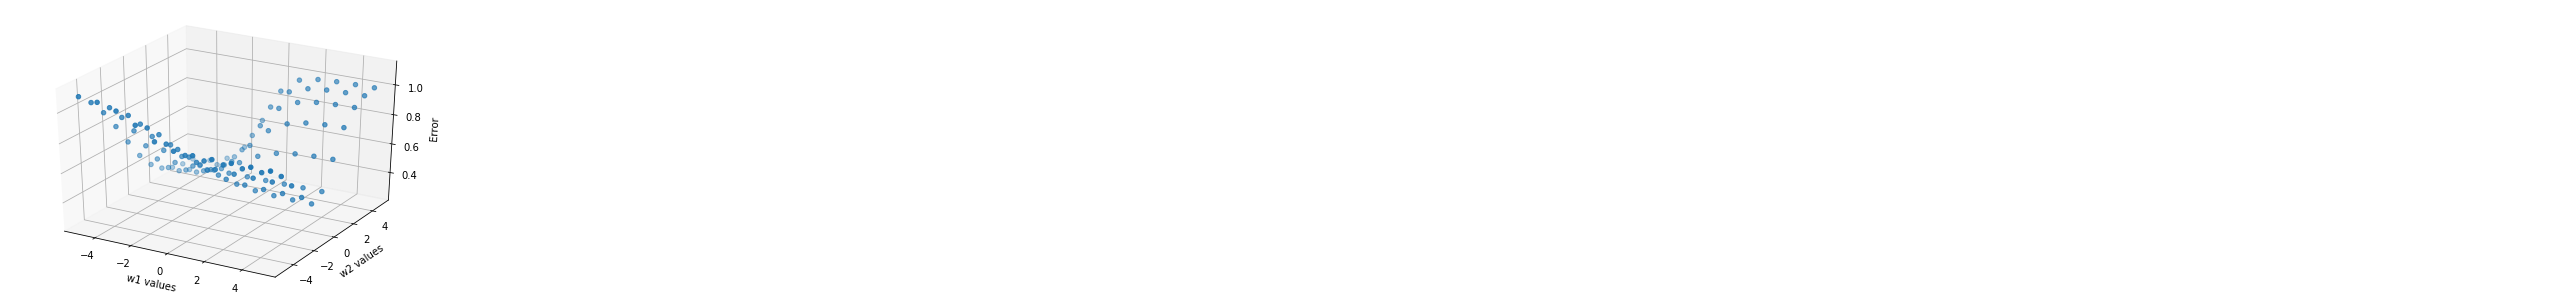

In [6]:
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
w1w2 = list(product(range(-5, 6), repeat = 2))
w1 = []
w2 = []
sum_error = []
for num1,num2 in w1w2:
    w1.append(num1)
    w2.append(num2)
    sum_error.append(sse(num1,num2))
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('w1 values')
ax.set_ylabel('w2 values')
ax.set_zlabel('Error')
ax.scatter(w1,w2,sum_error) 

### (e)
To compute weight updates, you can use the delta rule. The delta rule uses gradient descent to find a set of weights that have a lower error than the current set of weights. You can find the general form of this update equation and its derivation in the lecture 2 slides, but for the purposes of this problem you can use the version given in Equation 4. The term $(x_{i + 1}(1 - x_{i+1}))$ is the derivative of the logistic activation function from part a.

$$\Delta w_i = \eta\delta_{i+1}(x_{i+1}(1 - x_{i+1}))x_i \quad\quad (4)$$

Assume you have just seen the training example $(0,1)$. Use Equation 4 to compute the weight update $\Delta w_2$, assuming a learning rate of $\eta = 0.1$. (You can do this by hand or use Python; if by hand, show your work, and if using Python, provide your code.)

We want to find $\Delta w_i$, where $i = 2$, i.e.
$$\Delta w_2 = \eta\delta_{2+1}(x_{2+1}(1 - x_{2+1}))x_2$$
<br/>
Assume $w_1 = 5$ and $w_2 = -0.5$ <br />
Assume training example $(0,1)$<br />
Assume $\eta = 0.1$
<br/> 
From a), we determine $x_2 = 0.5$ and $x_3 = 0.43782349911$ (by Case 1)
<br/>
From b), we determine $\delta_{2+1} = (1 - 0.43782349911) = 0.56217650089$ (On $(0, 1)$)
<br/> 
Then we can calculate 
$$\Delta w_2 = (0.1)(0.56217650089)((0.43782349911)(1 - 0.43782349911))(0.5)$$
Therefore, the weight update is
$$\Delta w_2 = 0.00691853986$$

### (f)
Determining the weight update for $w_1$ is trickier, because you don't have the target activation for $x_2$. $\textit{Backpropagation of error}$ allows you to compute the error for this hidden unit as

$$\delta_2 = w_2\delta_3(x_3(1 - x_3)) \quad\quad (5)$$

This quantity can then be used in the equation in part 3 to compute the weight update for $w_1$. Compute the weight update $\Delta w_1$ for the training example $(0,1)$.

We want to find $\Delta w_i$, where $i = 1$, i.e.
$$\Delta w_1 = \eta\delta_{1+1}(x_{1+1}(1 - x_{1+1}))x_1$$
<br/>
Assume $w_1 = 5$ and $w_2 = -0.5$ <br />
Assume training example $(0,1)$, s.t. $x_1 = 0$ <br/>
Assume $\eta = 0.1$<br/>
Assume $\delta_3 = 0.56217650089$
<br/> 
From a), we determine $x_2 = 0.5$ and $x_3 = 0.43782349911$(by Case 1)
<br/>
We determine $\delta_{1+1} = w_2\delta_3(x_3(1 - x_3))$ as
$$\delta_{2} = (-0.5)(0.56217650089)(0.43782349911(1 - 0.43782349911))$$
$$\delta_{2} = -0.06918539869$$
<br/> 
Then we can calculate 
$$\Delta w_1 = (0.1)(-0.06918539869)((0.5)(1 - 0.5))(0)$$
Therefore, the weight update is
$$\Delta w_1 = 0$$

### (g)
Do these weight updates take you in the direction of the "optimal" weights you identified in part (d)? Explain your results in terms of your error plot from part (d) and the limitations on gradient descent learning algorithms.

Yes, these weight updates go into the direction of the "optimal" weights identified in d). The reason why is that there is only one local minima, and an increase of weight updates will eventually find the lowest point, i.e. lowest error, within the scatter plot. Weight updates increase to find the lowest point of error, so in this case we may conclude that it will go into the direction of the "optimal" weights.

One limitation on gradient descent learning algorithms is that if there are multiple local minima of error, the learning algorithm may 'get stuck' at a local minima, which may or may not be the global minimum of the error. One way to solve this is to run multiple algorithms with different initial weights so that it may have a higher likelihood of finding the global minimum.